In [9]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
spotify_path = '/content/gdrive/MyDrive/0. Tensorflow/spotify_songs.csv'

In [5]:
# import data 
df = pd.read_csv(spotify_path)

# removing unique identifiers (these columns are not informative)
df=df.drop(columns = ['track_album_id','playlist_id']) 

# check data
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,2001-01-01,Pinoy Classic Rock,rock,classic rock,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [6]:
df.describe().round(decimals=2)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00,18454.00
mean,42.44,0.64,0.69,5.34,-6.77,0.58,0.11,0.18,0.05,0.19,0.52,120.81,230319.31
std,24.62,0.15,0.18,3.61,2.92,0.49,0.10,0.22,0.17,0.15,0.23,27.59,57255.09
min,0.00,0.10,0.02,0.00,-34.28,0.00,0.02,0.00,0.00,0.01,0.00,37.11,31893.00
25%,24.00,0.55,0.57,2.00,-8.25,0.00,0.04,0.02,0.00,0.09,0.34,98.86,193230.25
50%,48.00,0.66,0.72,6.00,-6.23,1.00,0.06,0.08,0.00,0.13,0.52,120.04,221340.00
75%,62.00,0.76,0.84,9.00,-4.72,1.00,0.13,0.25,0.00,0.25,0.70,135.98,258078.25
max,100.00,0.98,1.00,11.00,1.27,1.00,0.92,0.99,0.99,1.00,0.99,214.05,517810.00


In [7]:
df.shape, df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_name          18454 non-null  object 
 6   track_album_release_date  18454 non-null  object 
 7   playlist_name             18454 non-null  object 
 8   playlist_genre            18454 non-null  object 
 9   playlist_subgenre         18454 non-null  object 
 10  danceability              18454 non-null  float64
 11  energy                    18454 non-null  float64
 12  key                       18454 non-null  int64  
 13  loudness                  18454 non-null  float64
 14  mode  

((18454, 23),
 Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
        'track_album_name', 'track_album_release_date', 'playlist_name',
        'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
        'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'duration_ms', 'language'],
       dtype='object'),
 None)

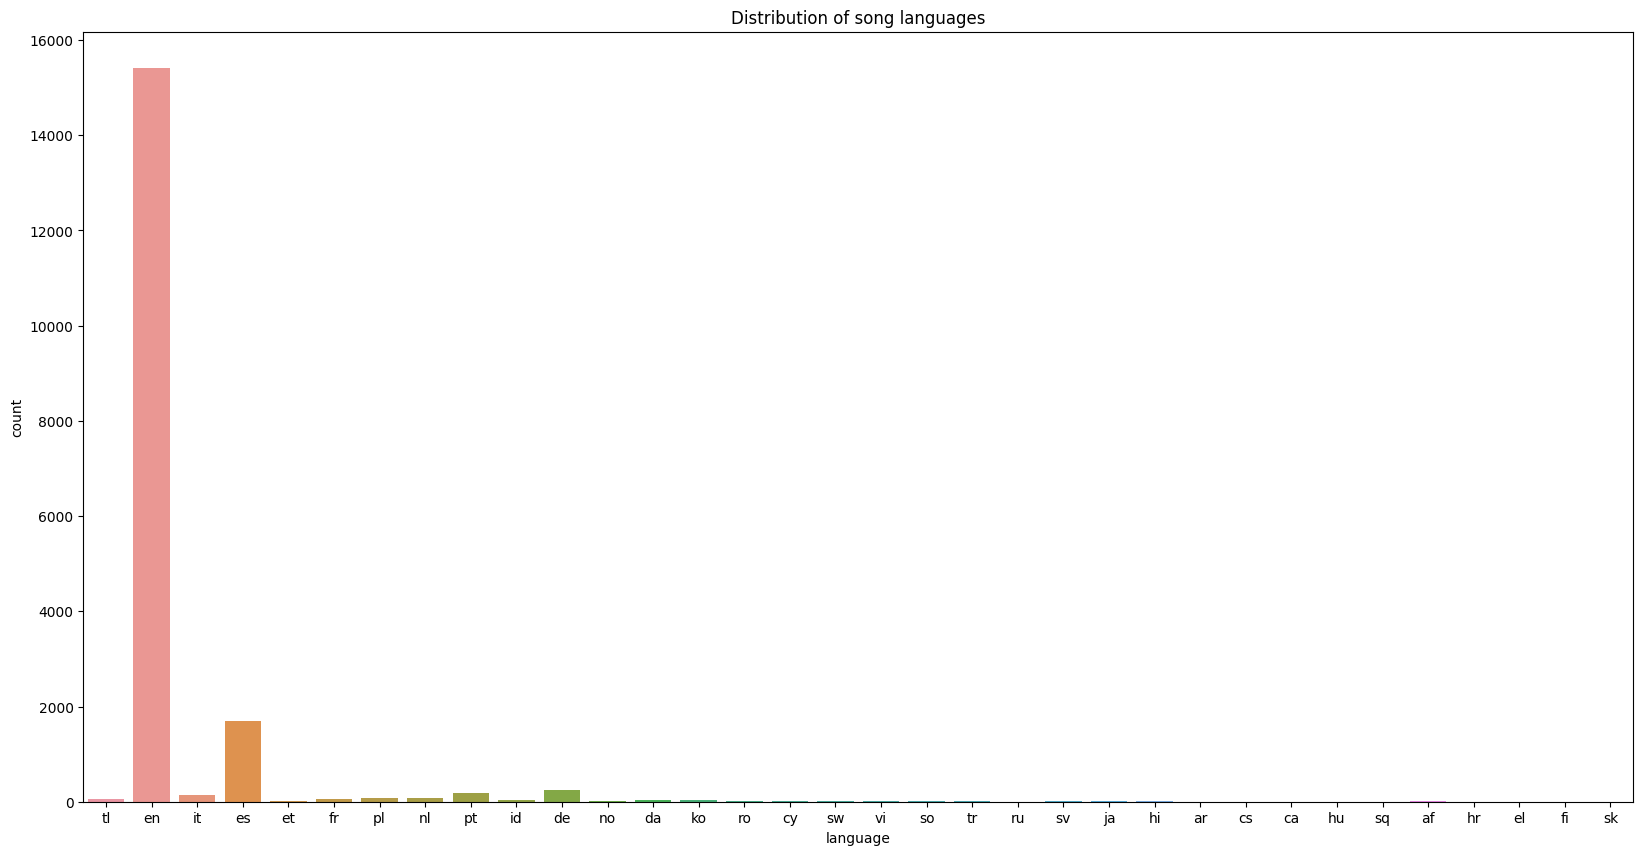

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x='language', data=df)
ax.set_title('Distribution of song languages')

plt.show()

In [13]:
df_en = df[df['language'] == 'en']
df_en['language'].value_counts()

en    15405
Name: language, dtype: int64

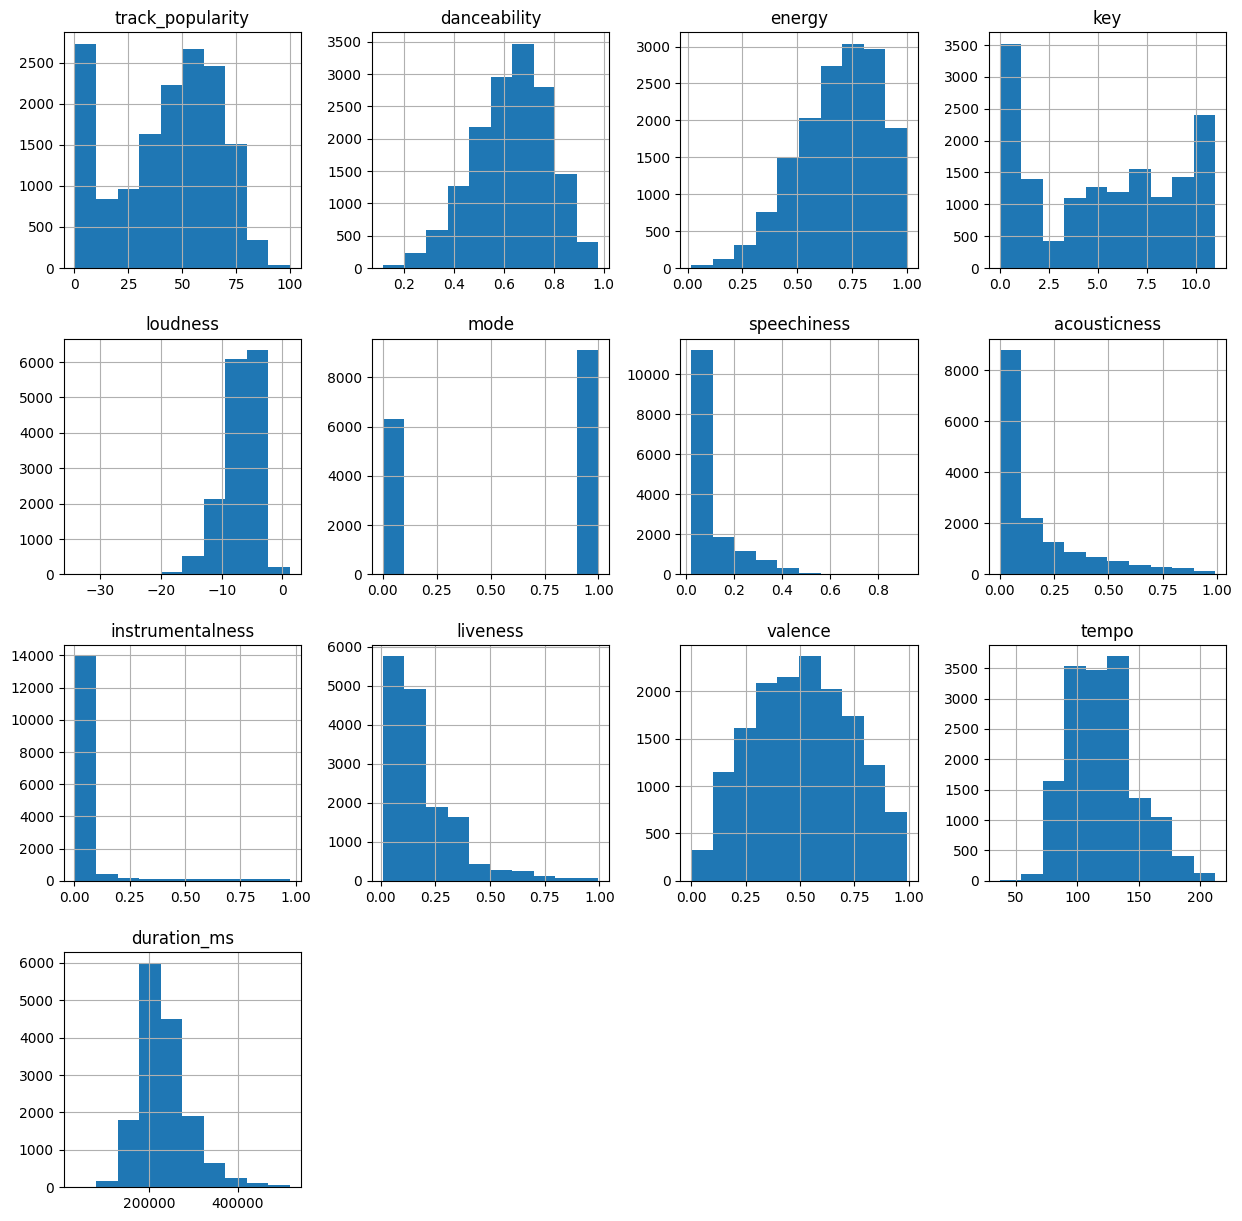

In [14]:
df_en.hist(figsize = (15,15))
plt.show()

<ipython-input-16-8c471f27ec5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_en.corr(), annot=True)


<Axes: >

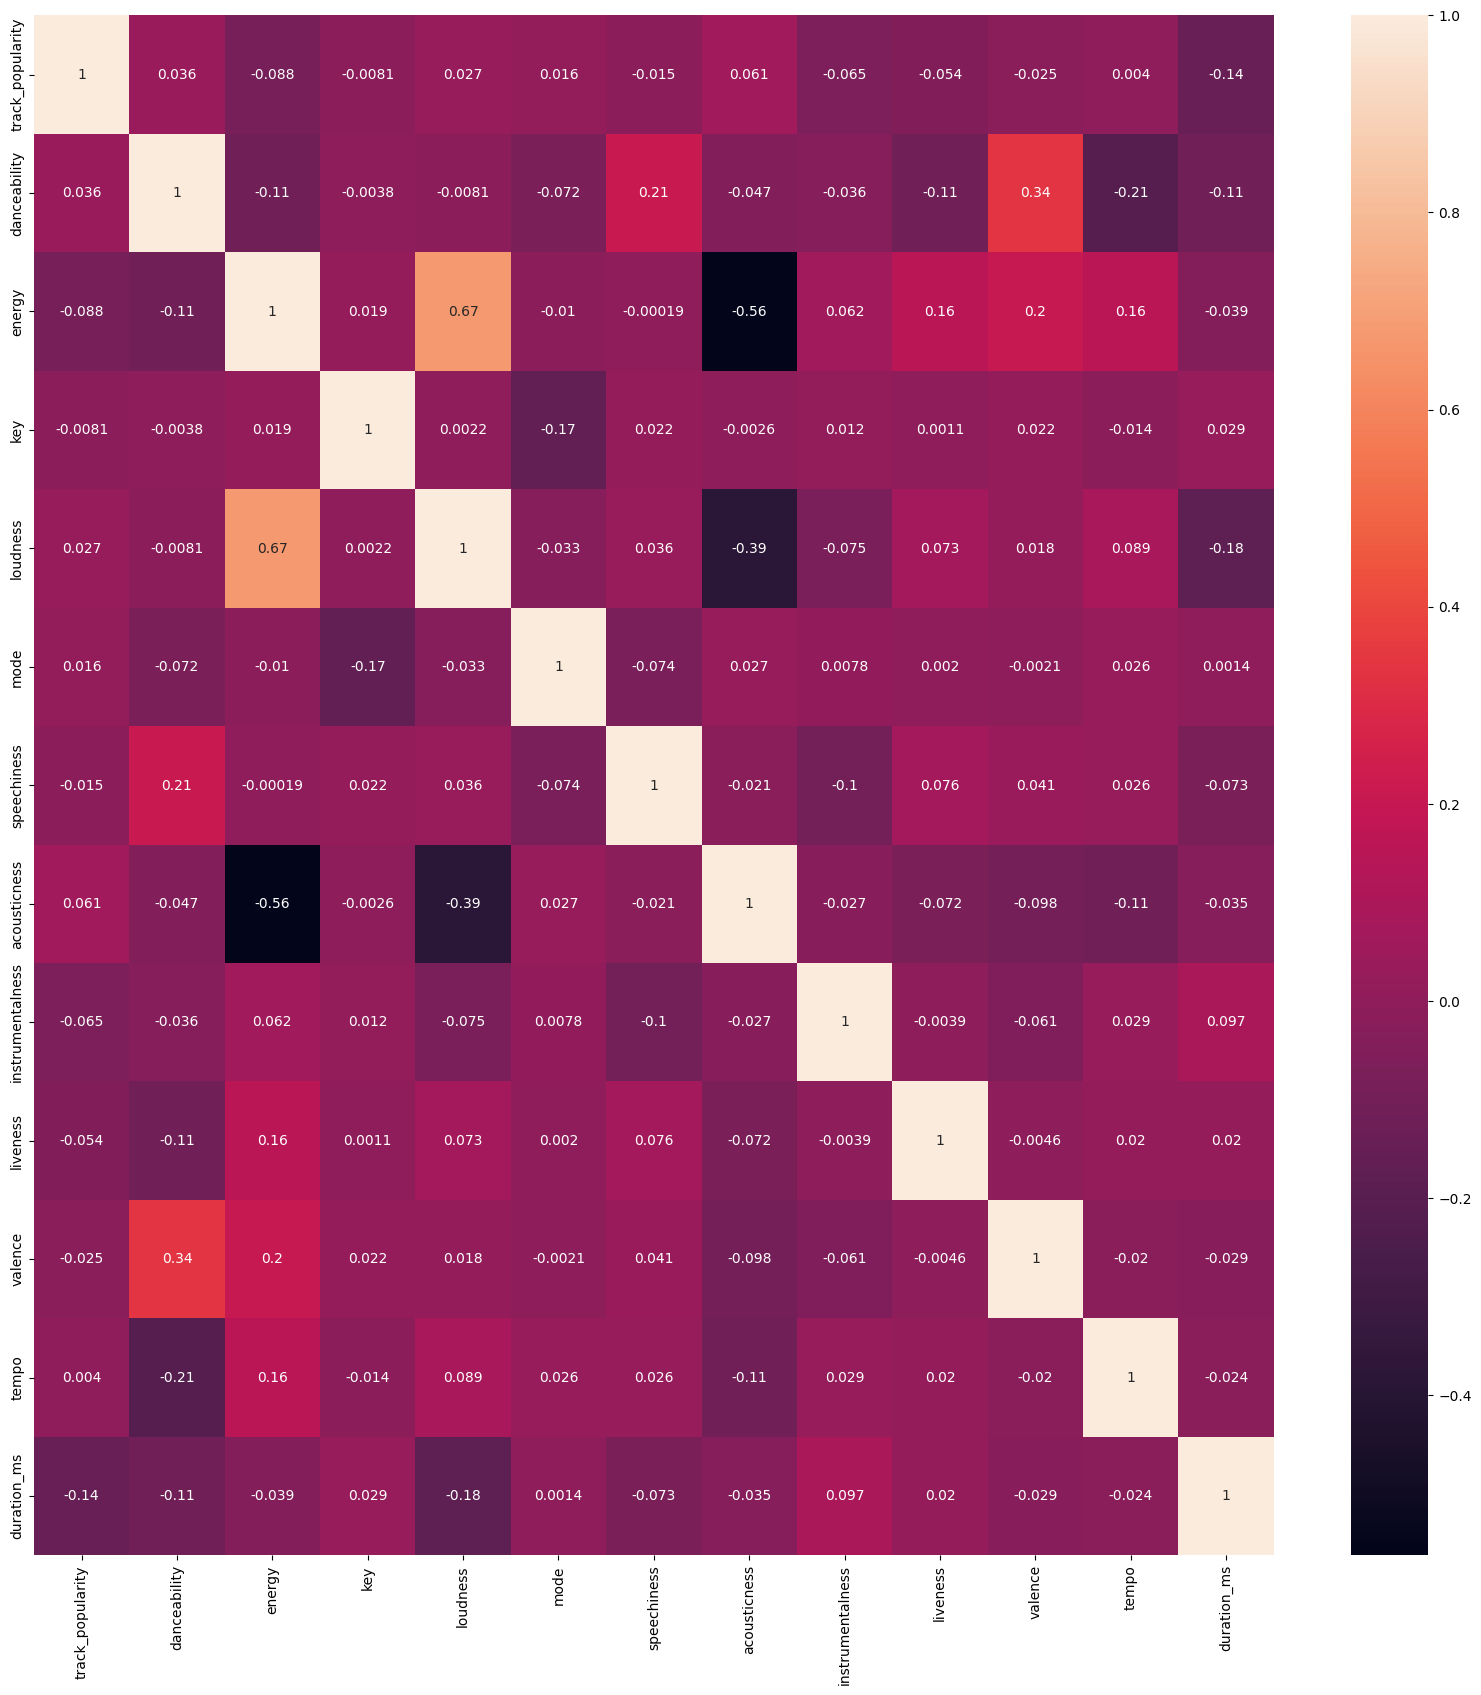

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df_en.corr(), annot=True)

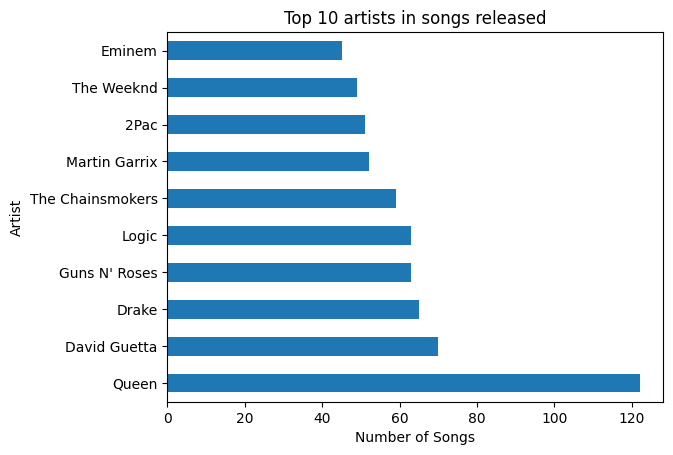

In [17]:
df_en['track_artist'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.title('Top 10 artists in songs released')

plt.show()

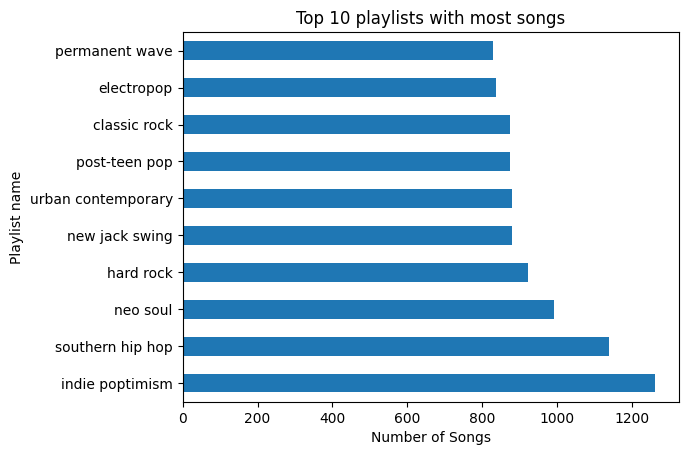

In [21]:
df_en['playlist_subgenre'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Number of Songs')
plt.ylabel('Playlist name')
plt.title('Top 10 playlists with most songs')

plt.show()

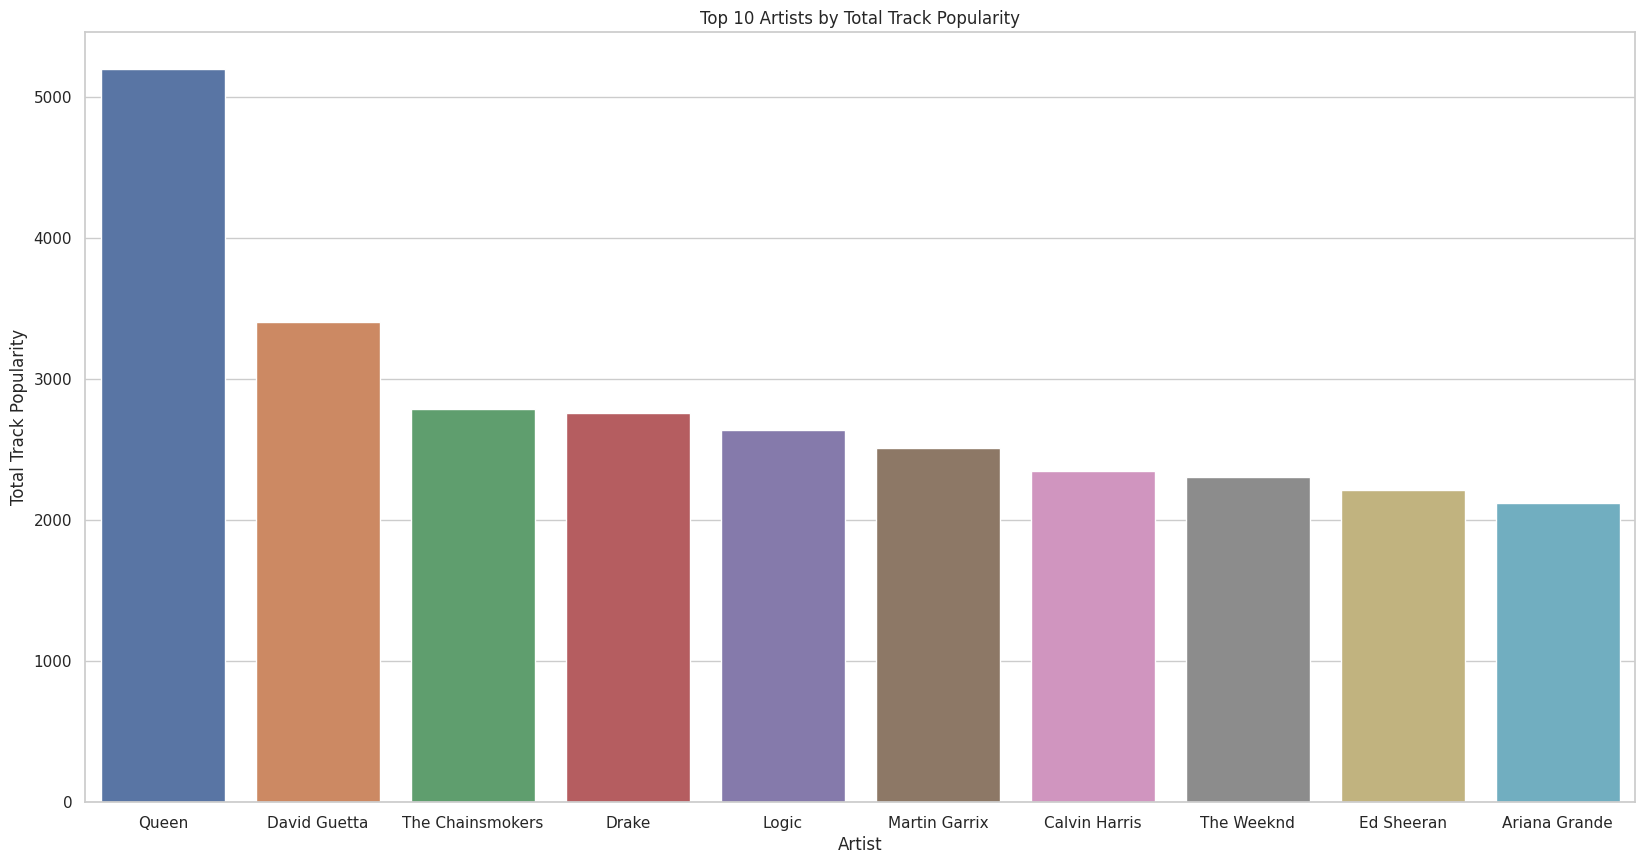

In [24]:
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid')

x = df_en.groupby('track_artist')['track_popularity'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x=x.index, y=x)

plt.xlabel('Artist')
plt.ylabel('Total Track Popularity')
plt.title('Top 10 Artists by Total Track Popularity')

plt.show()


<ipython-input-25-343406d5a8e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfgroup = df_en.groupby(['track_artist'], as_index = False).sum().sort_values('track_popularity', ascending=False)
<ipython-input-25-343406d5a8e8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_entop10.corr(), annot=True)


<Axes: >

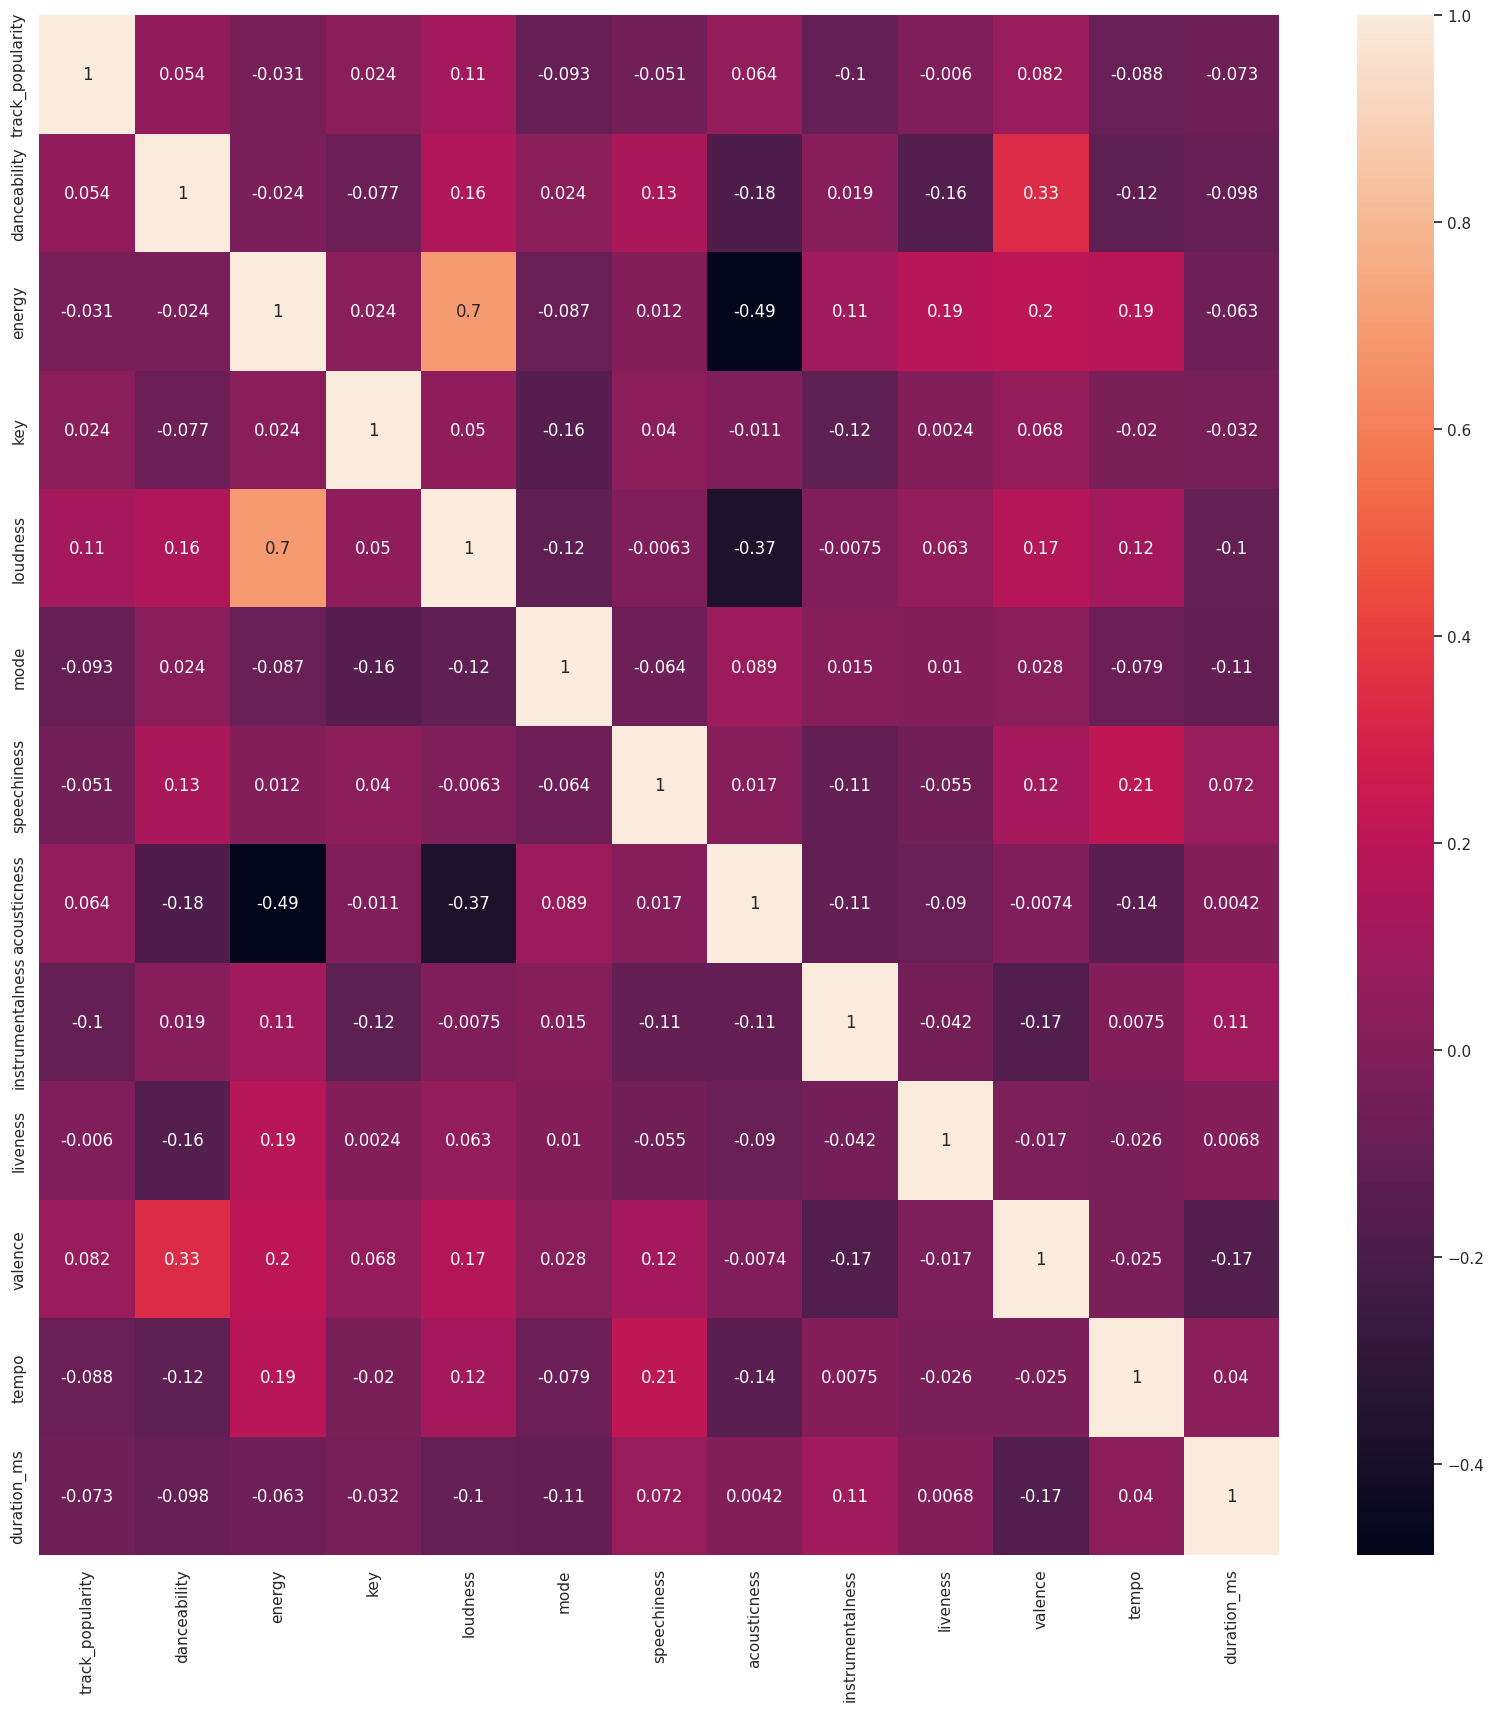

In [25]:
dfgroup = df_en.groupby(['track_artist'], as_index = False).sum().sort_values('track_popularity', ascending=False)
top10artist = dfgroup['track_artist'].head(10).tolist()
df_entop10 = df_en[df_en['track_artist'].isin(top10artist)]

plt.figure(figsize=(20,20))
sns.heatmap(df_entop10.corr(), annot=True)

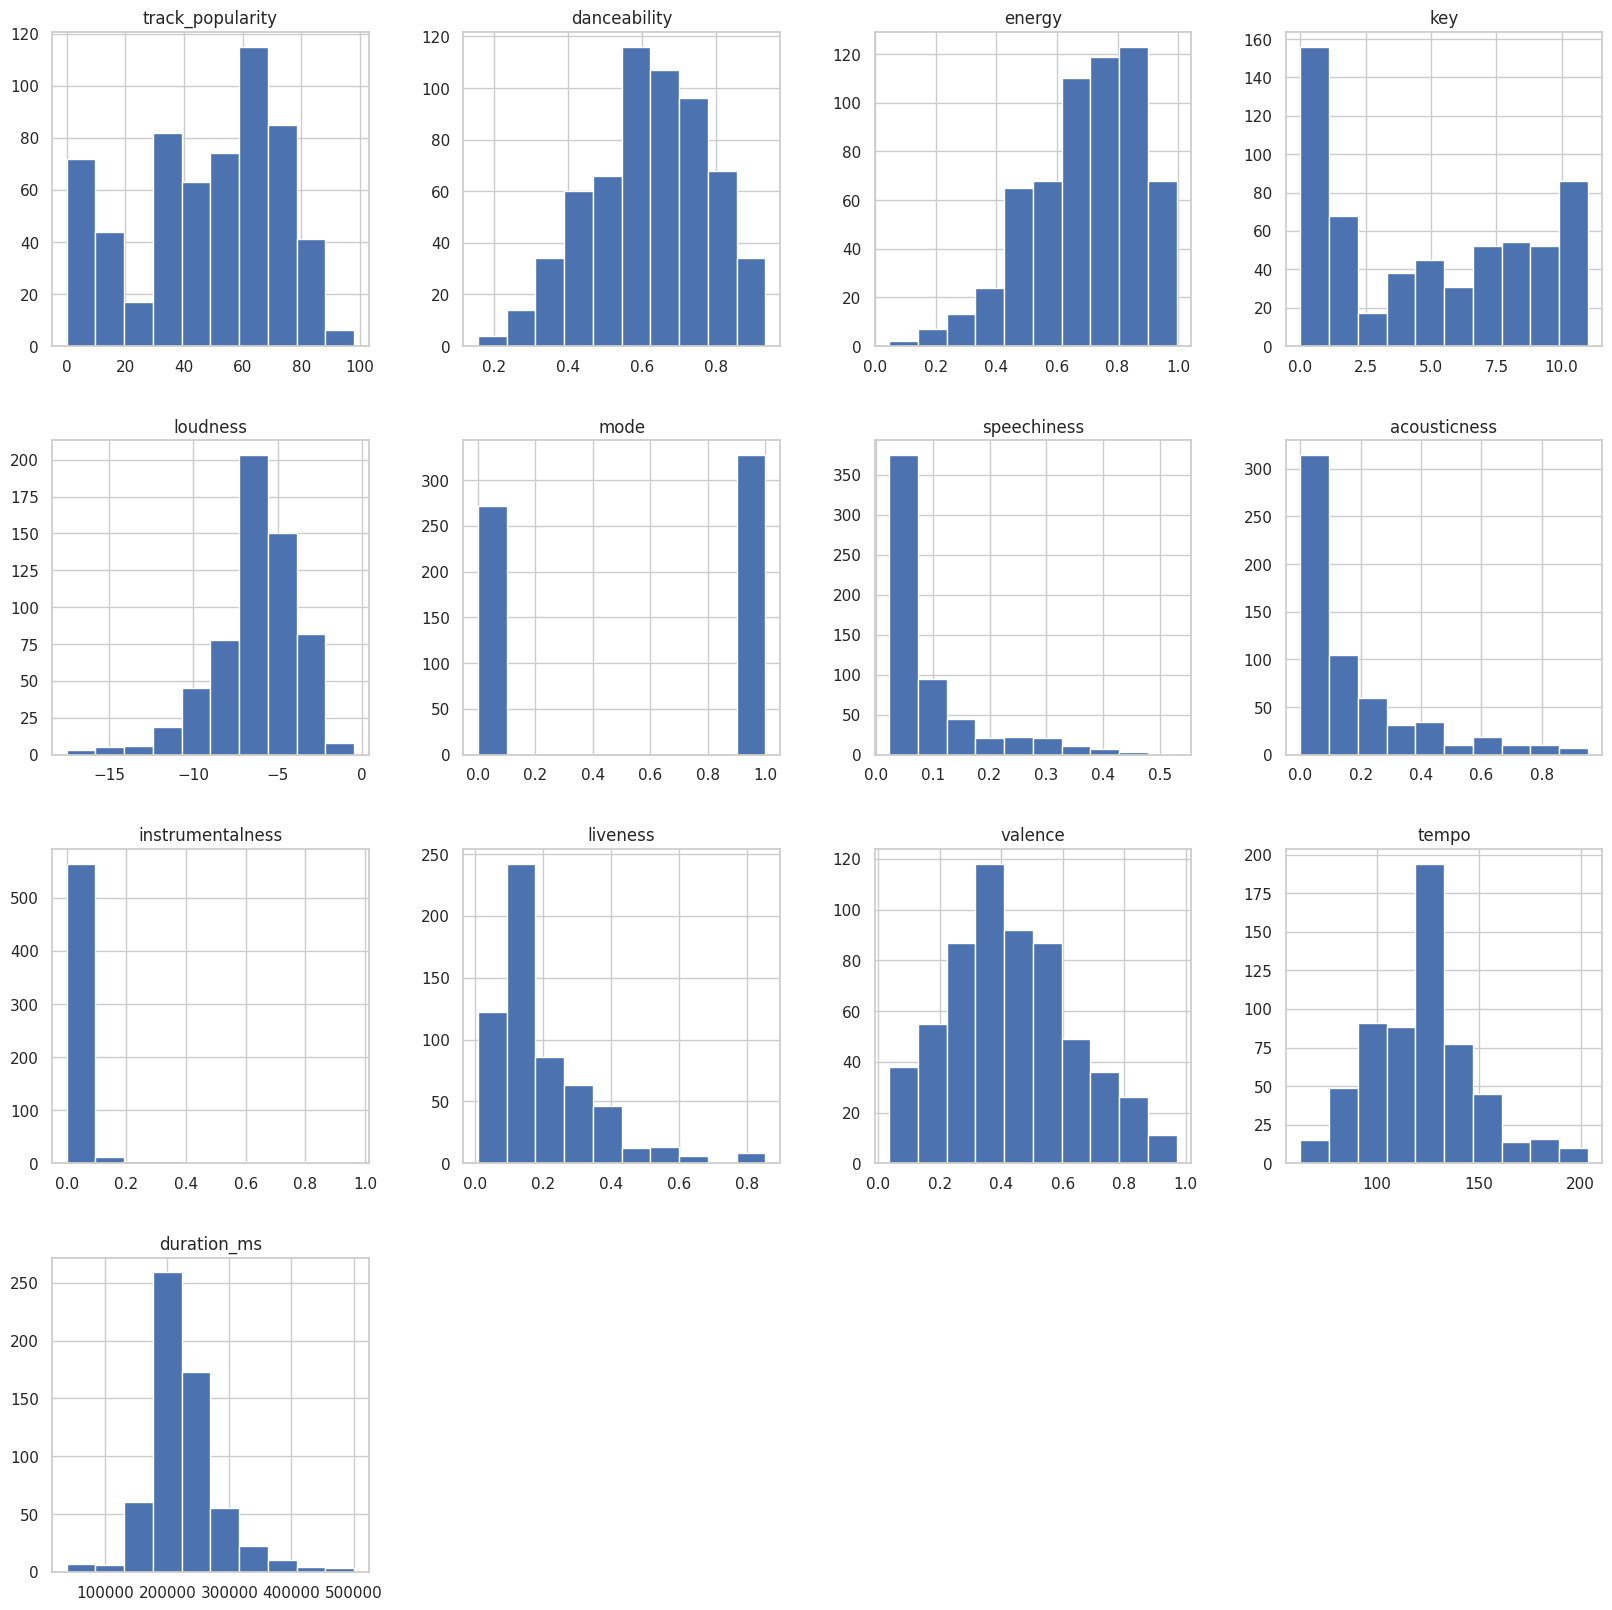

In [26]:
df_entop10.hist(figsize = (20,20))
plt.show()

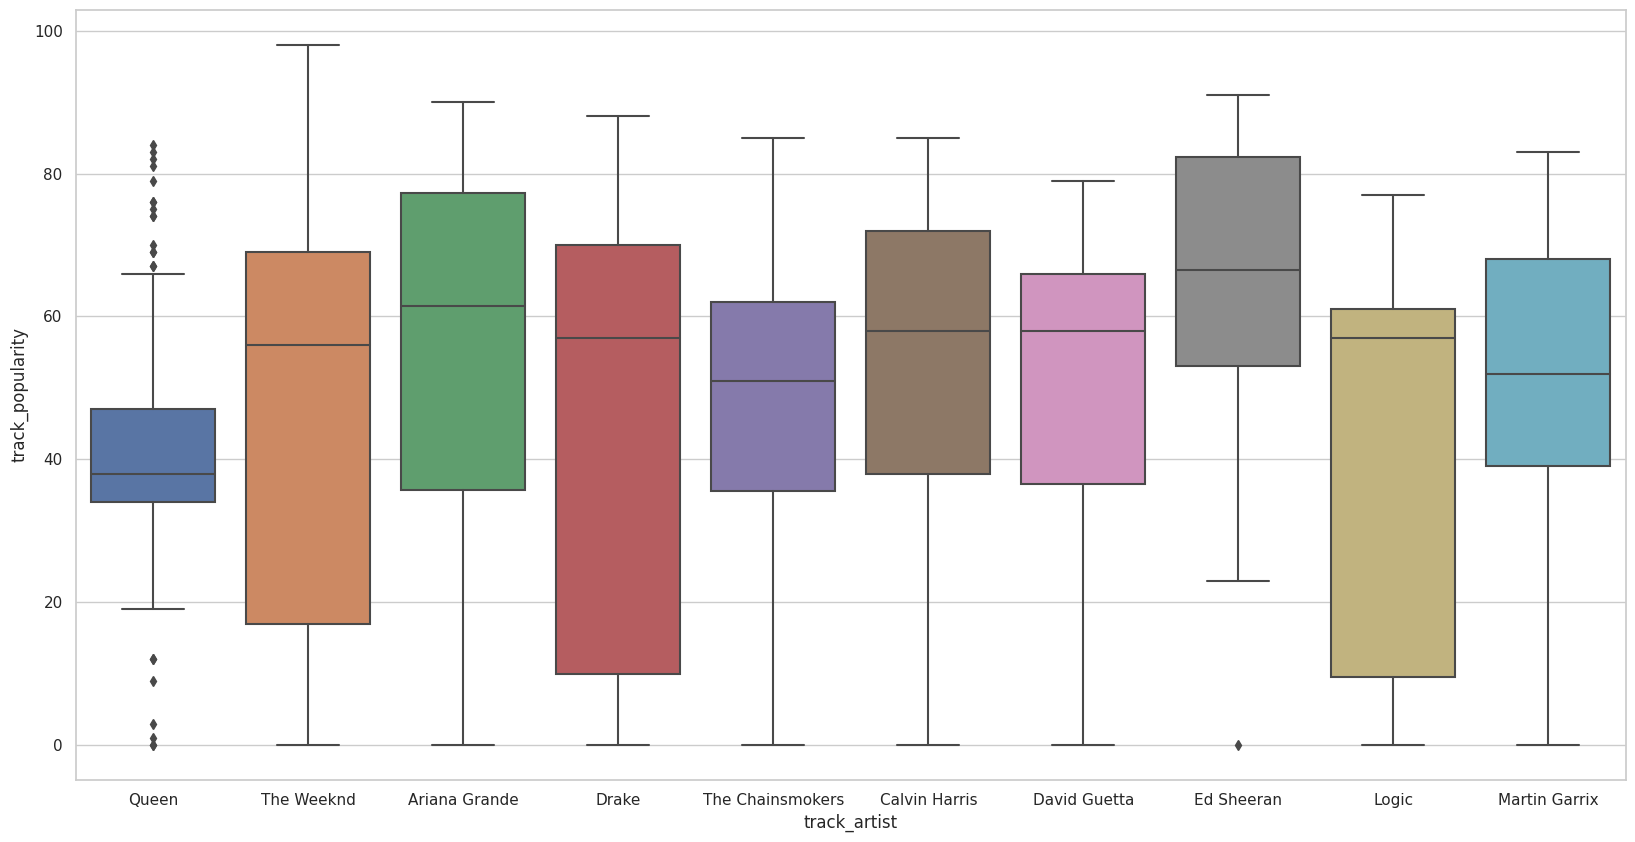

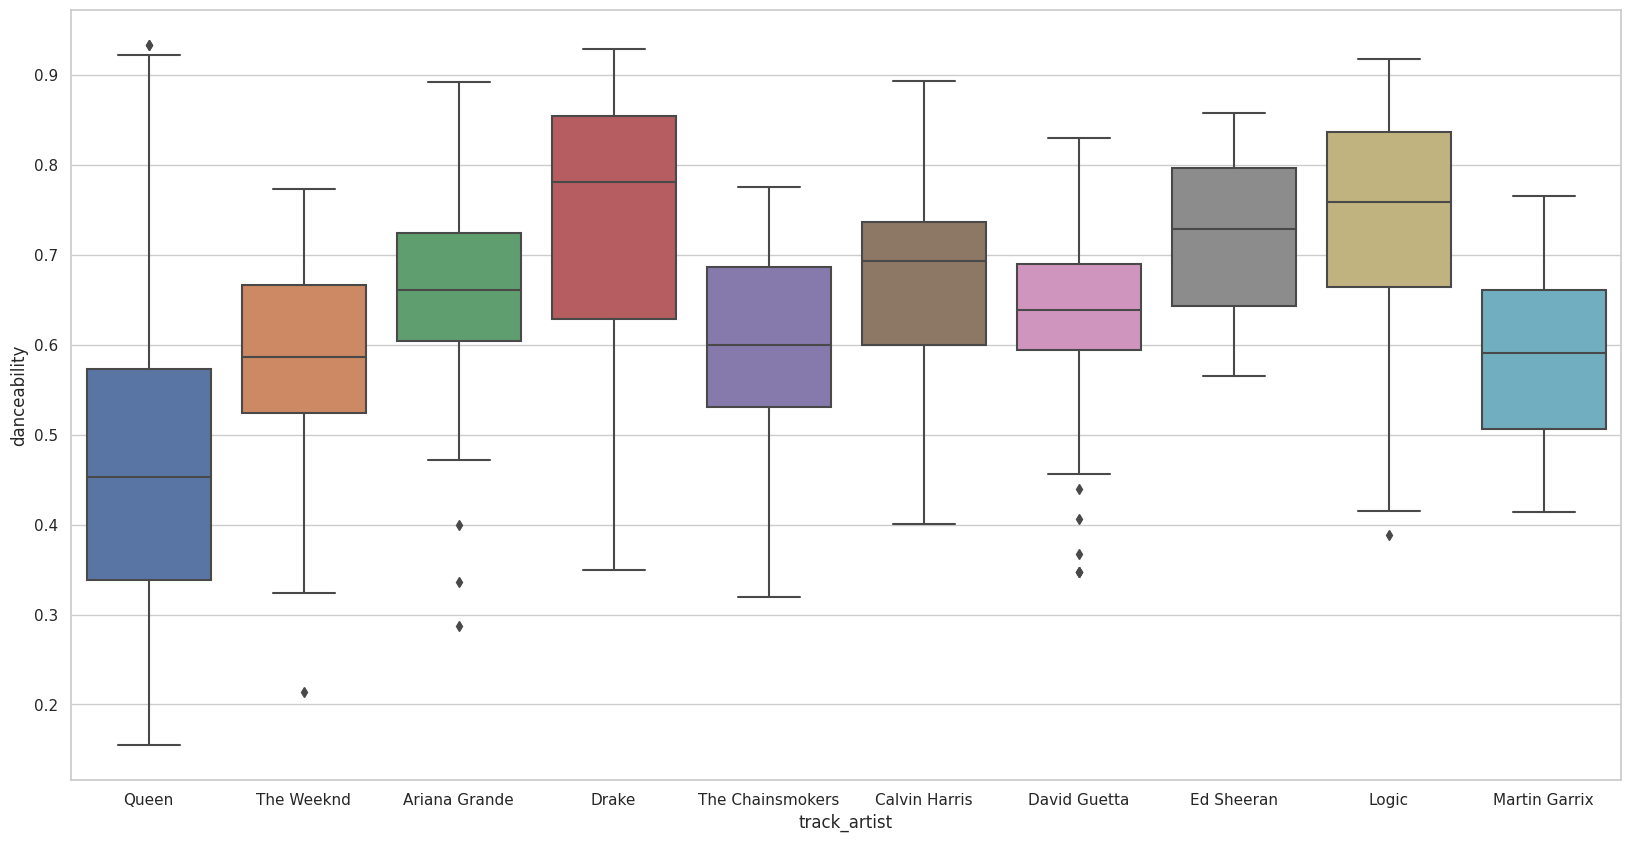

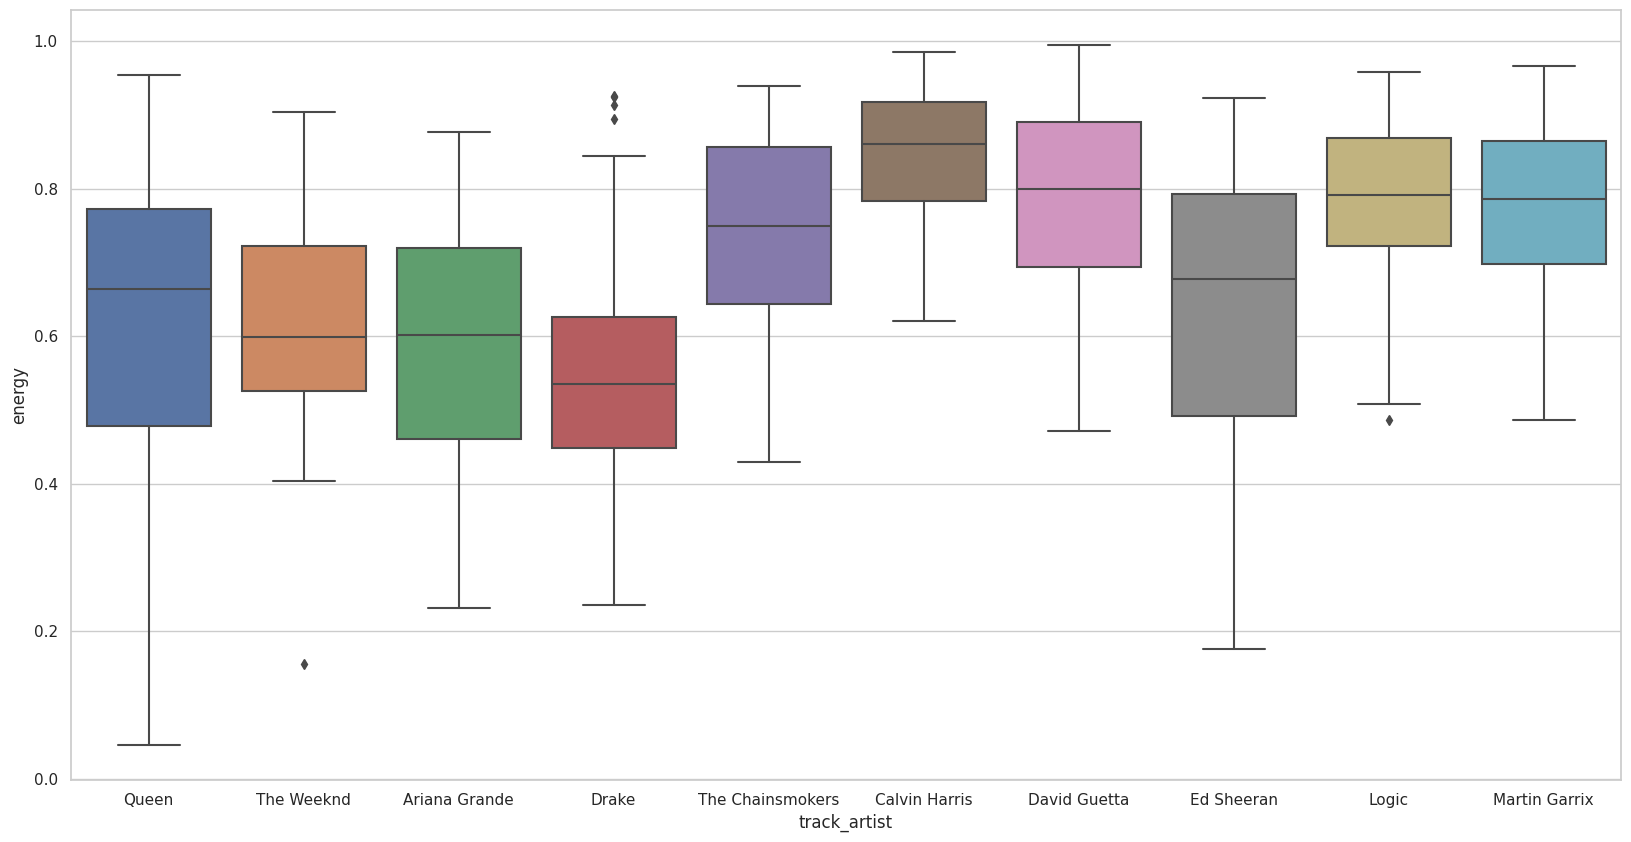

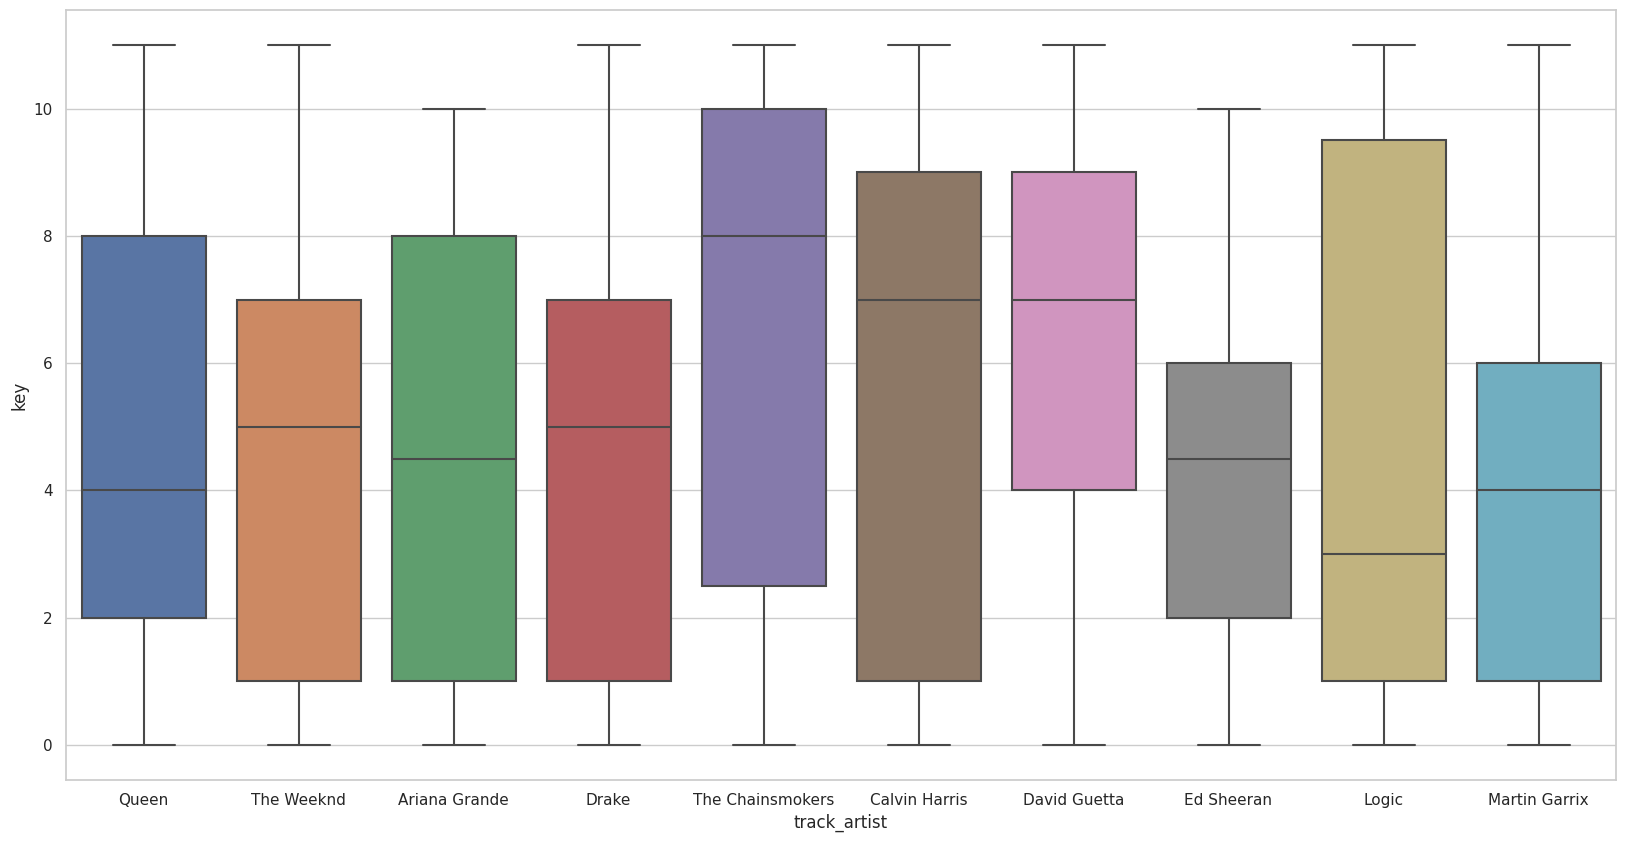

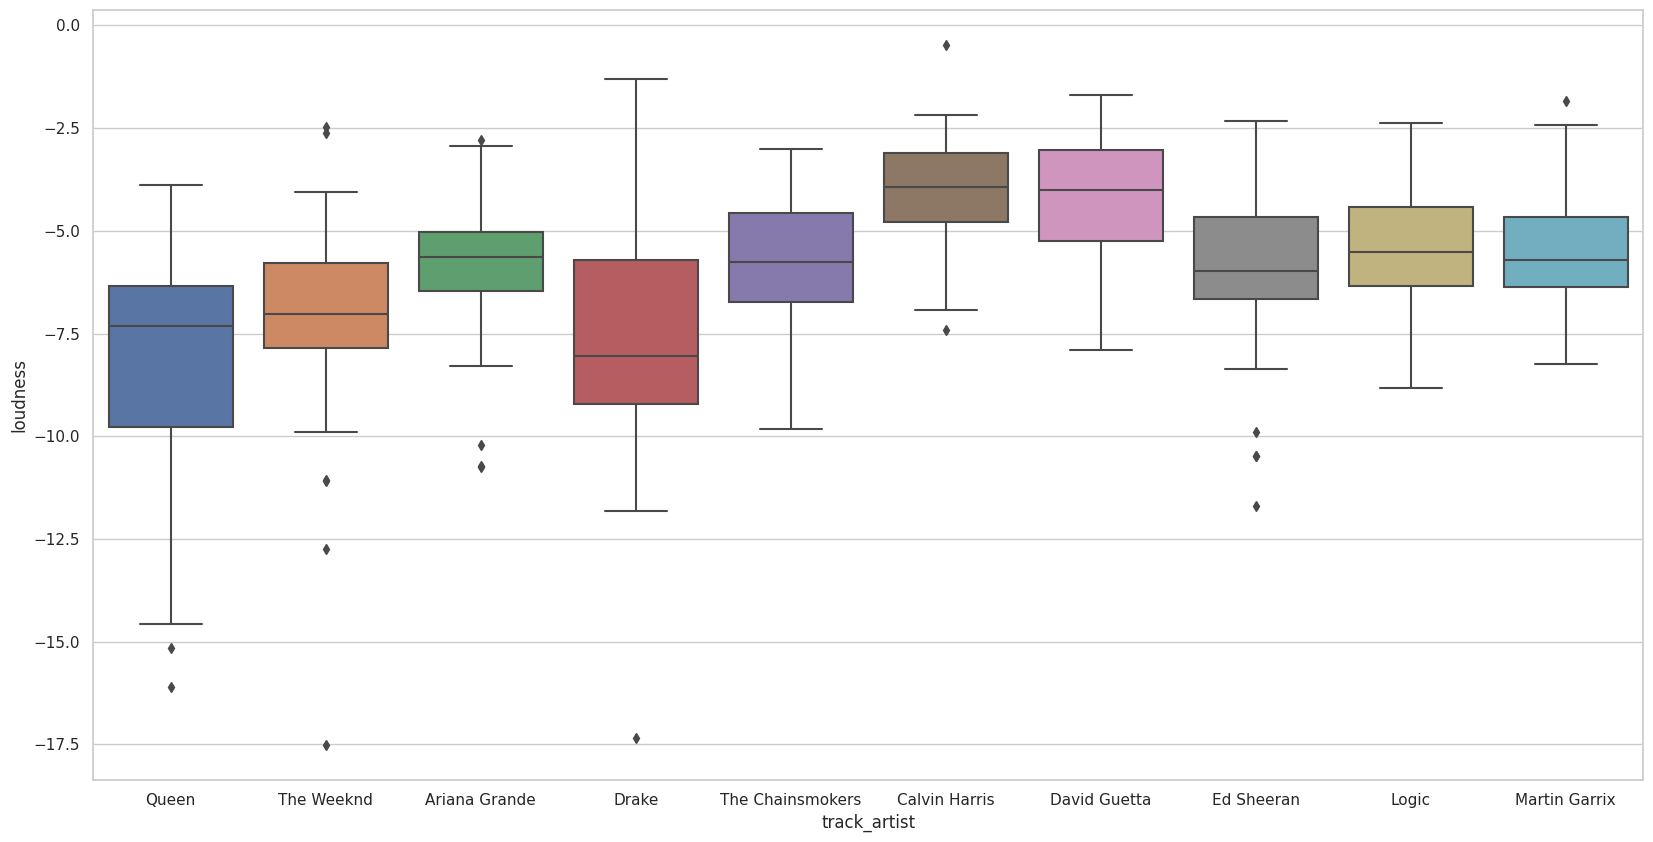

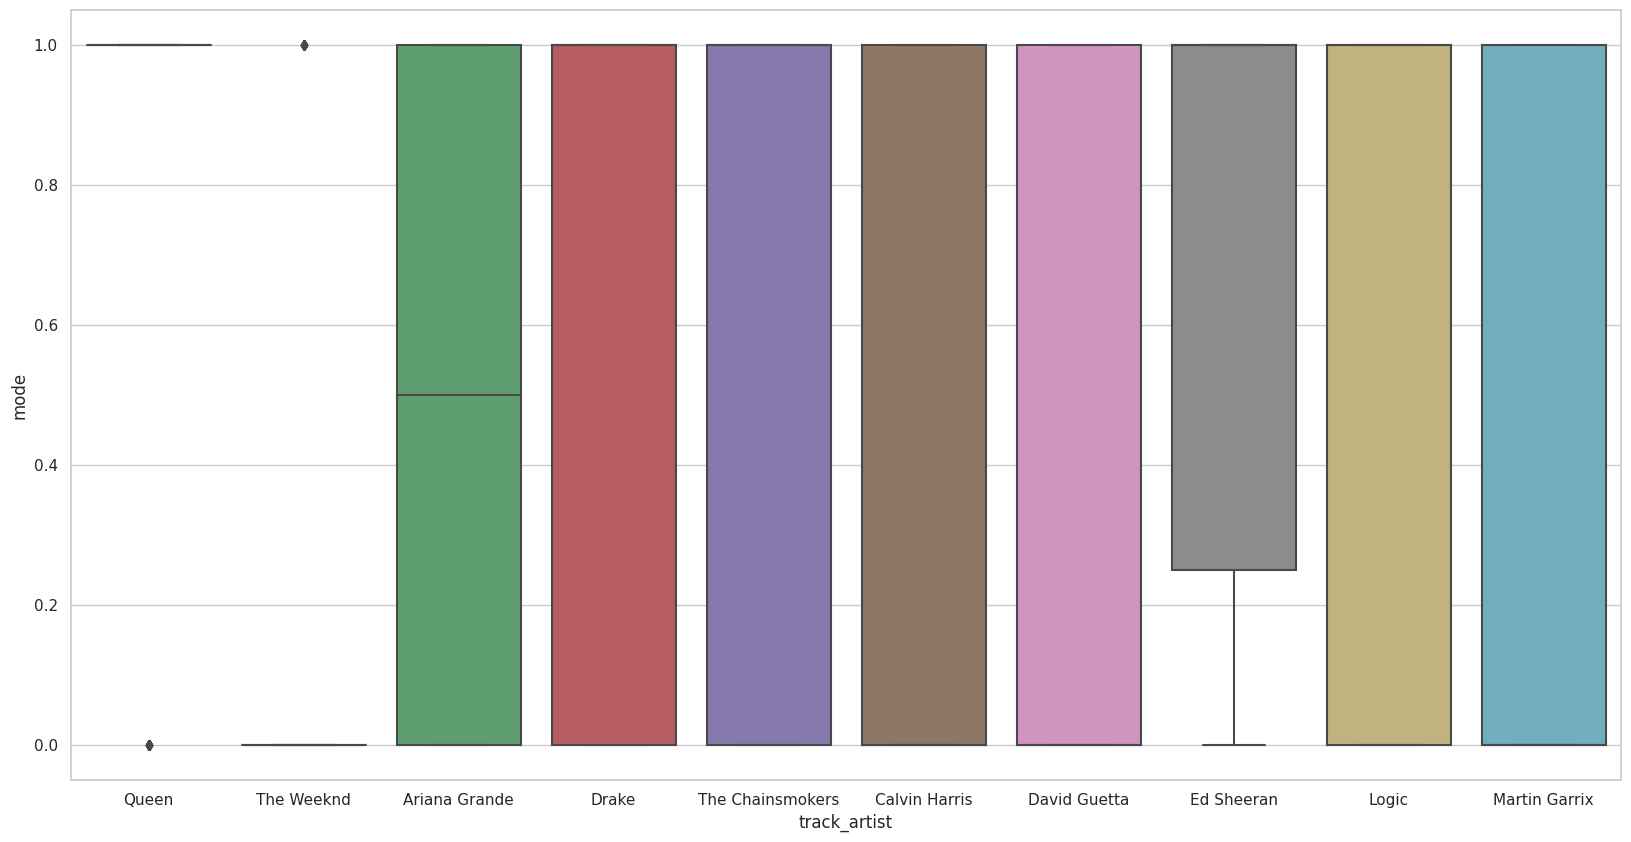

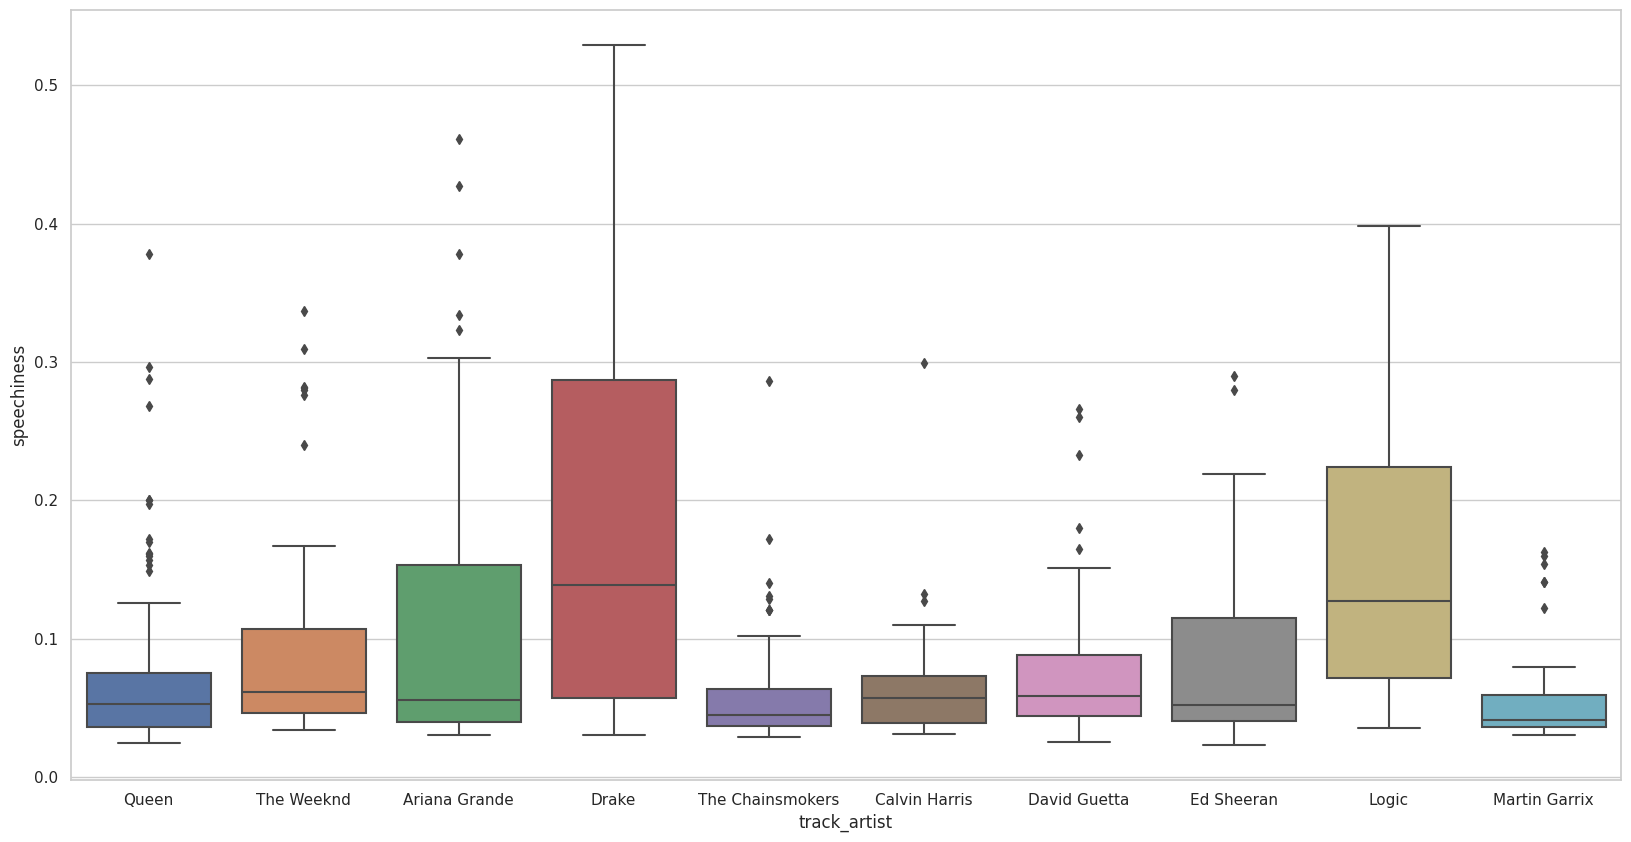

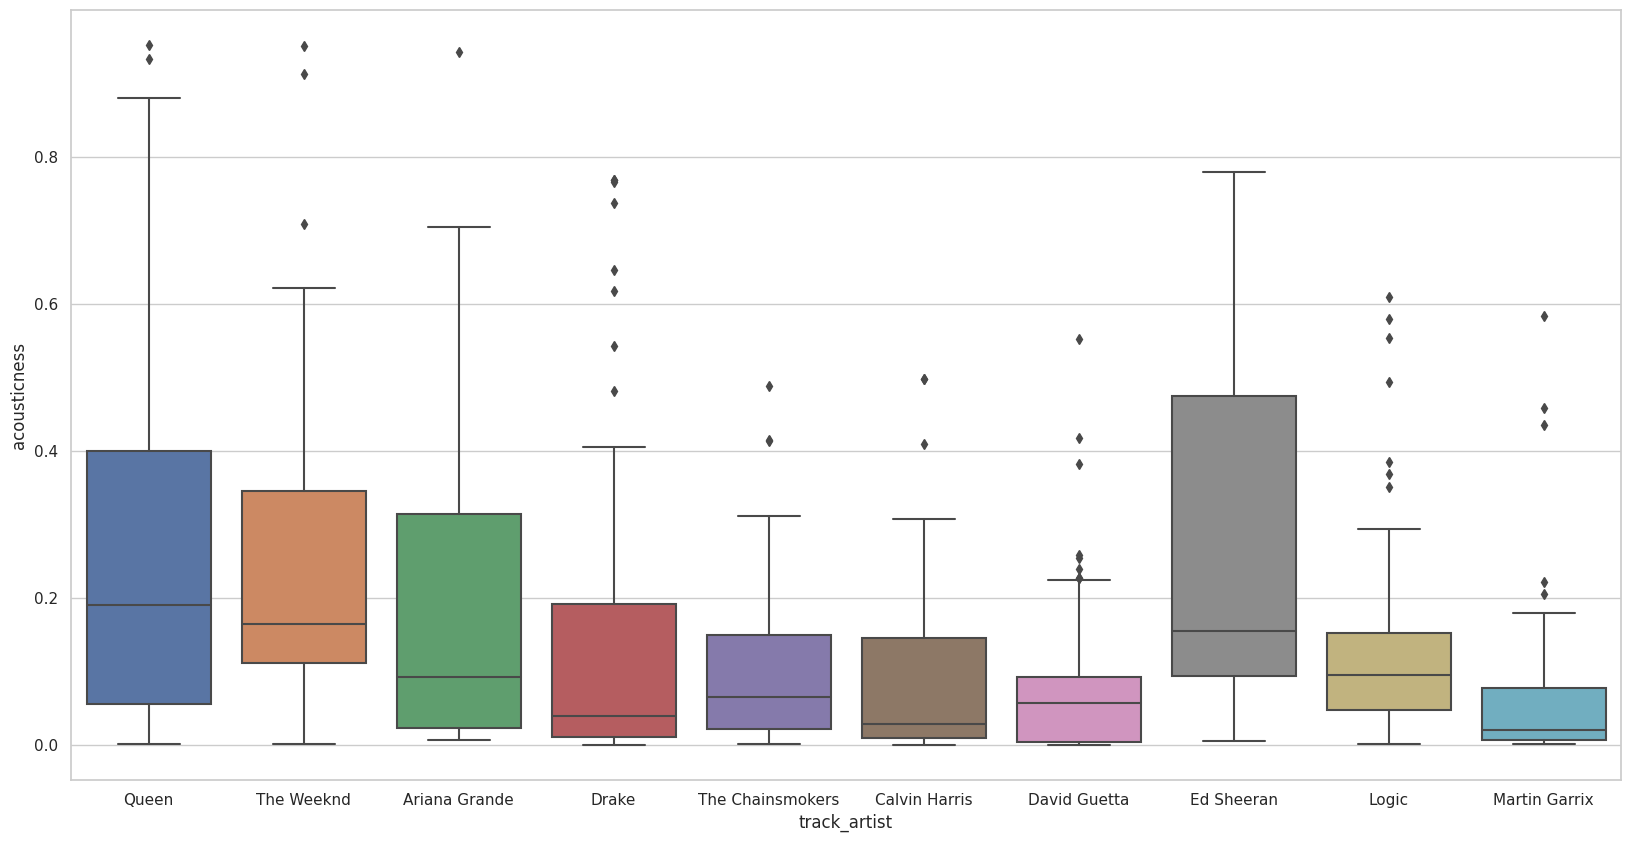

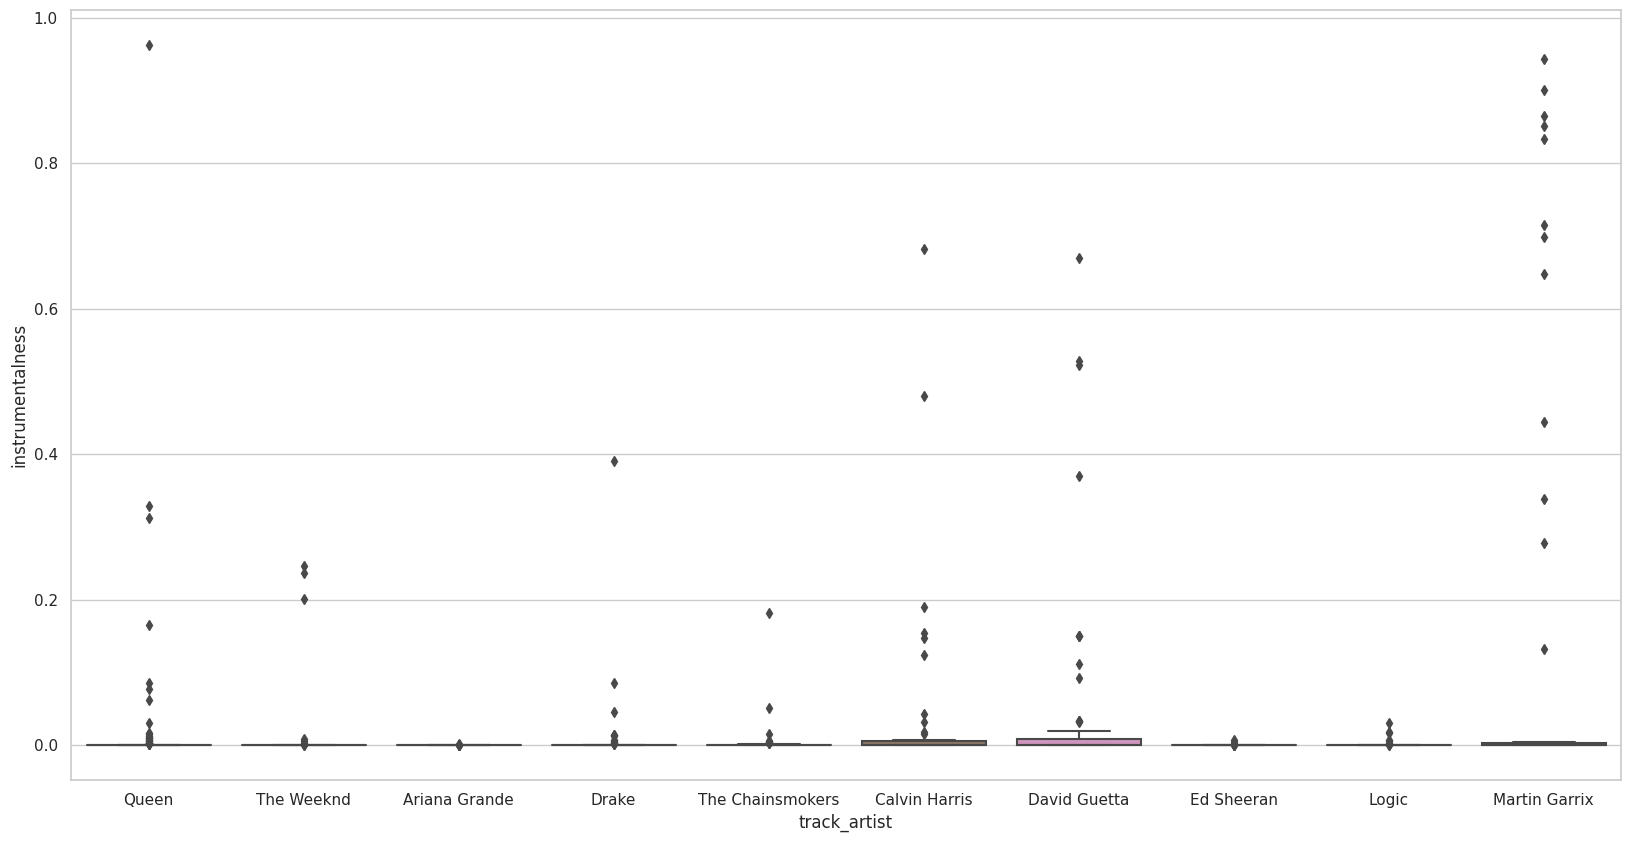

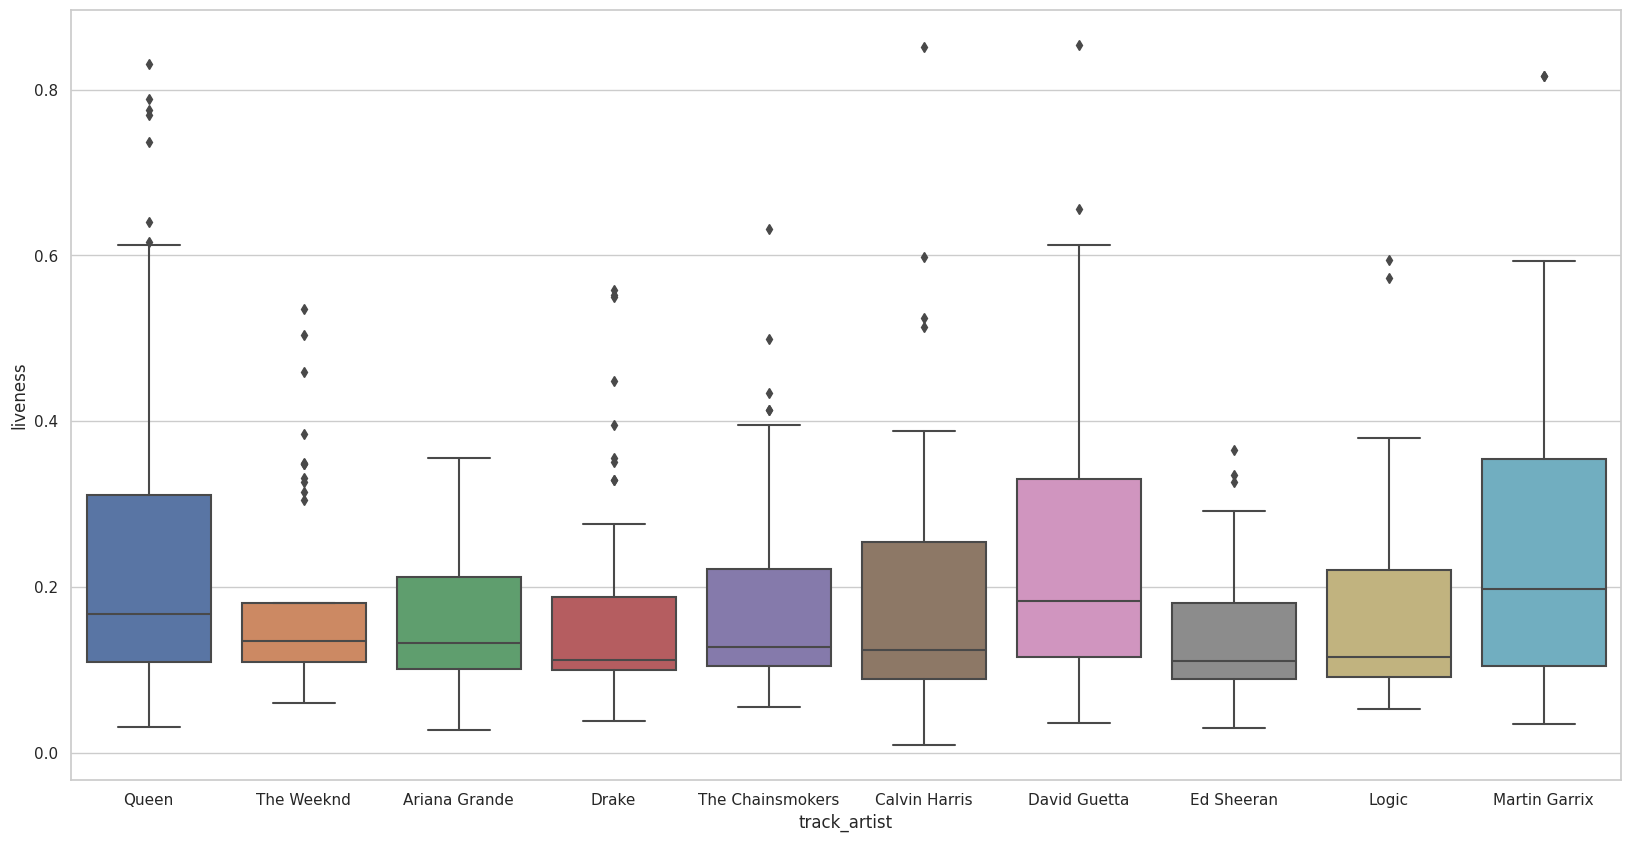

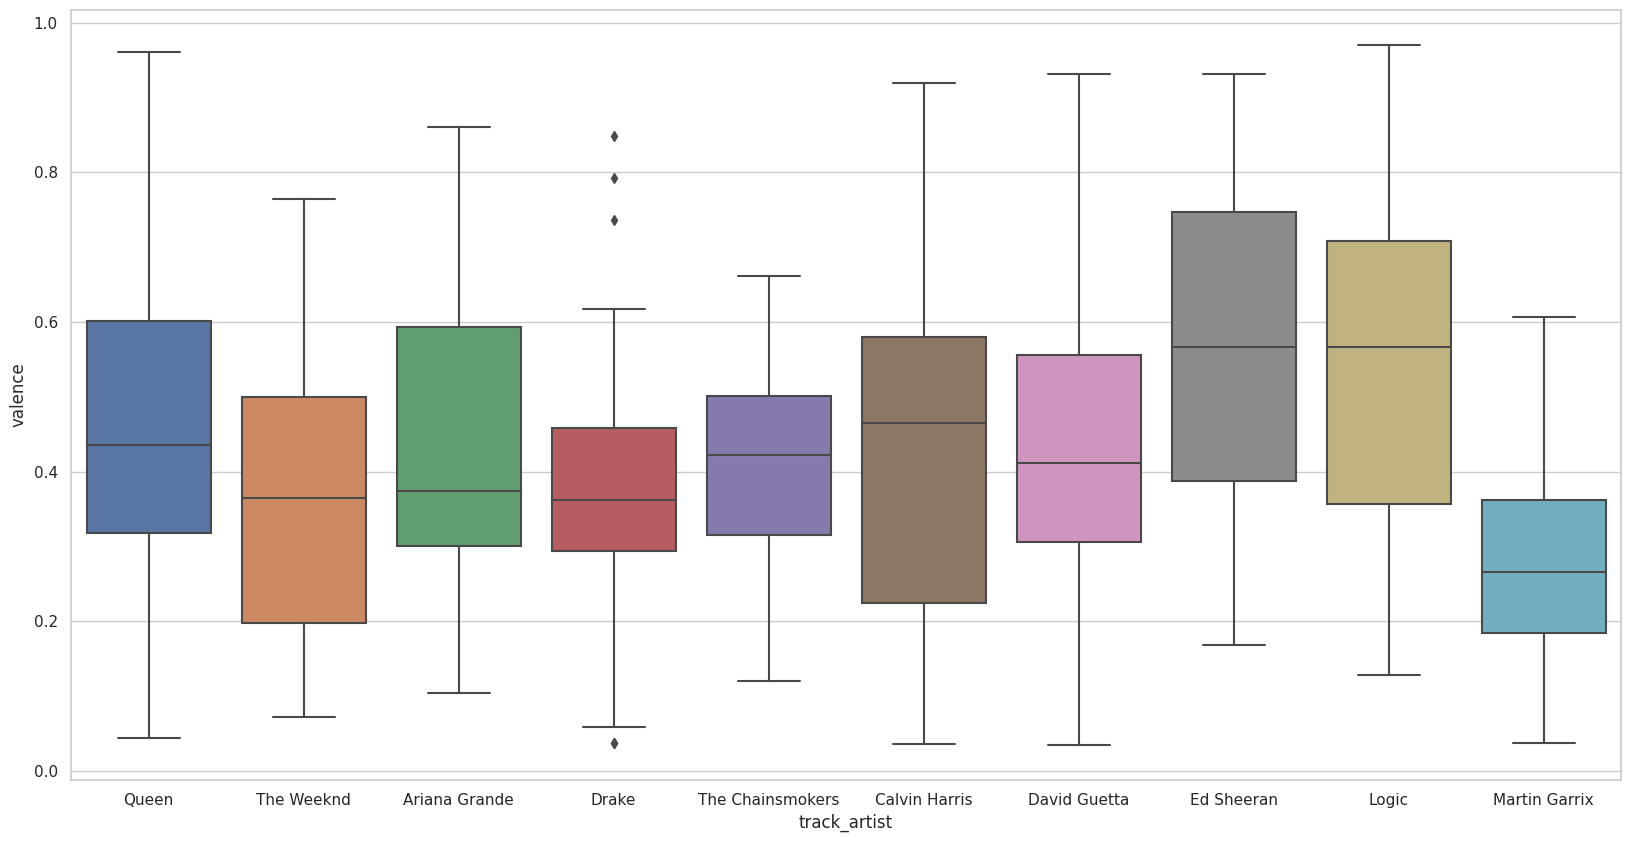

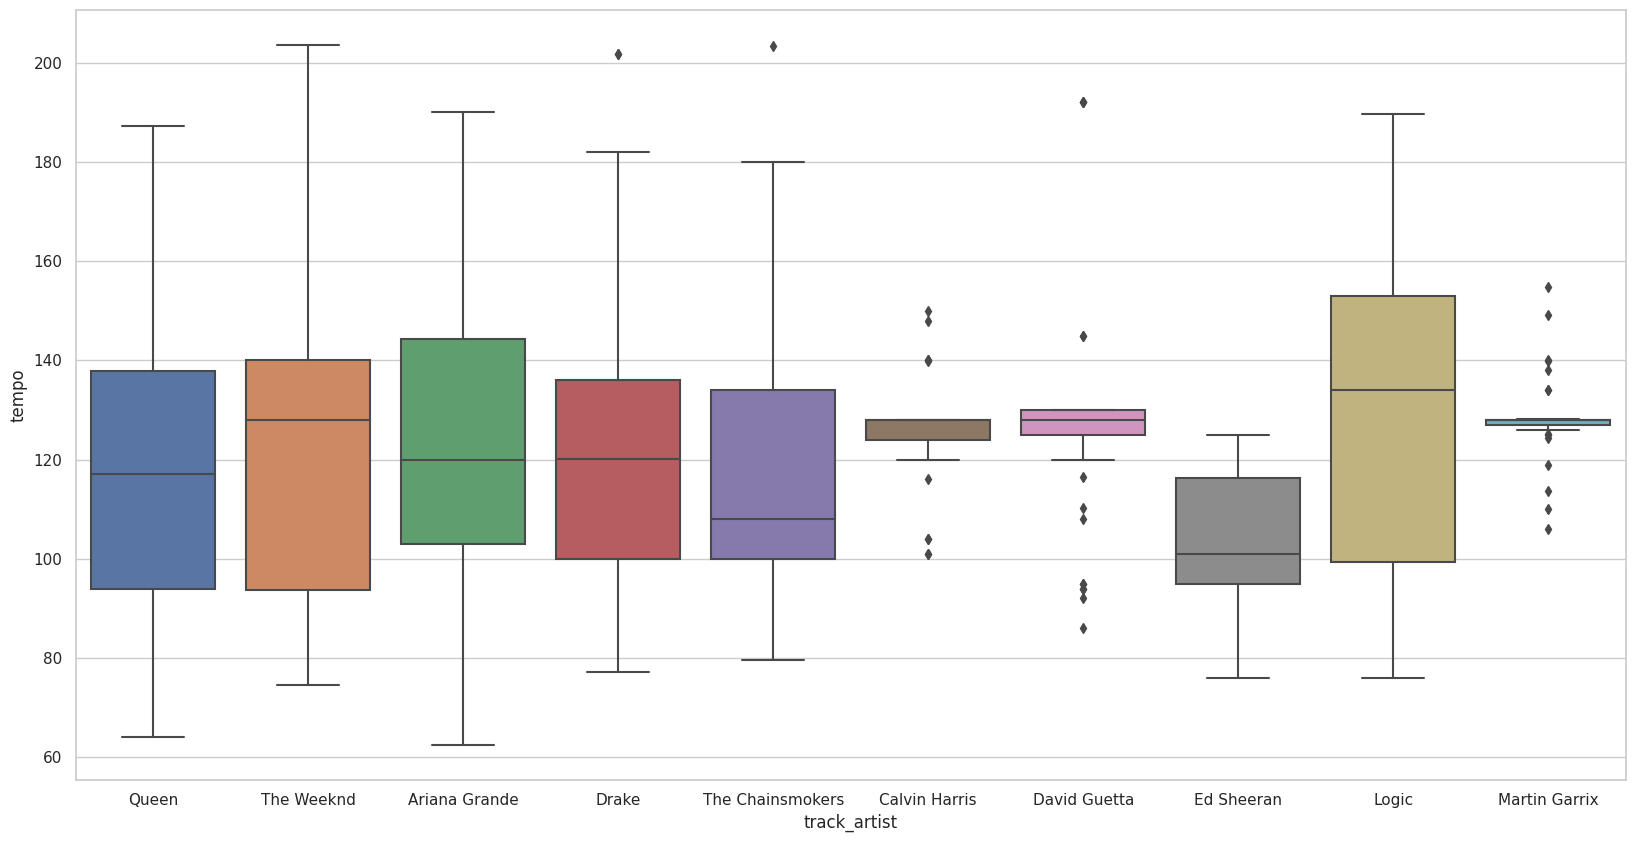

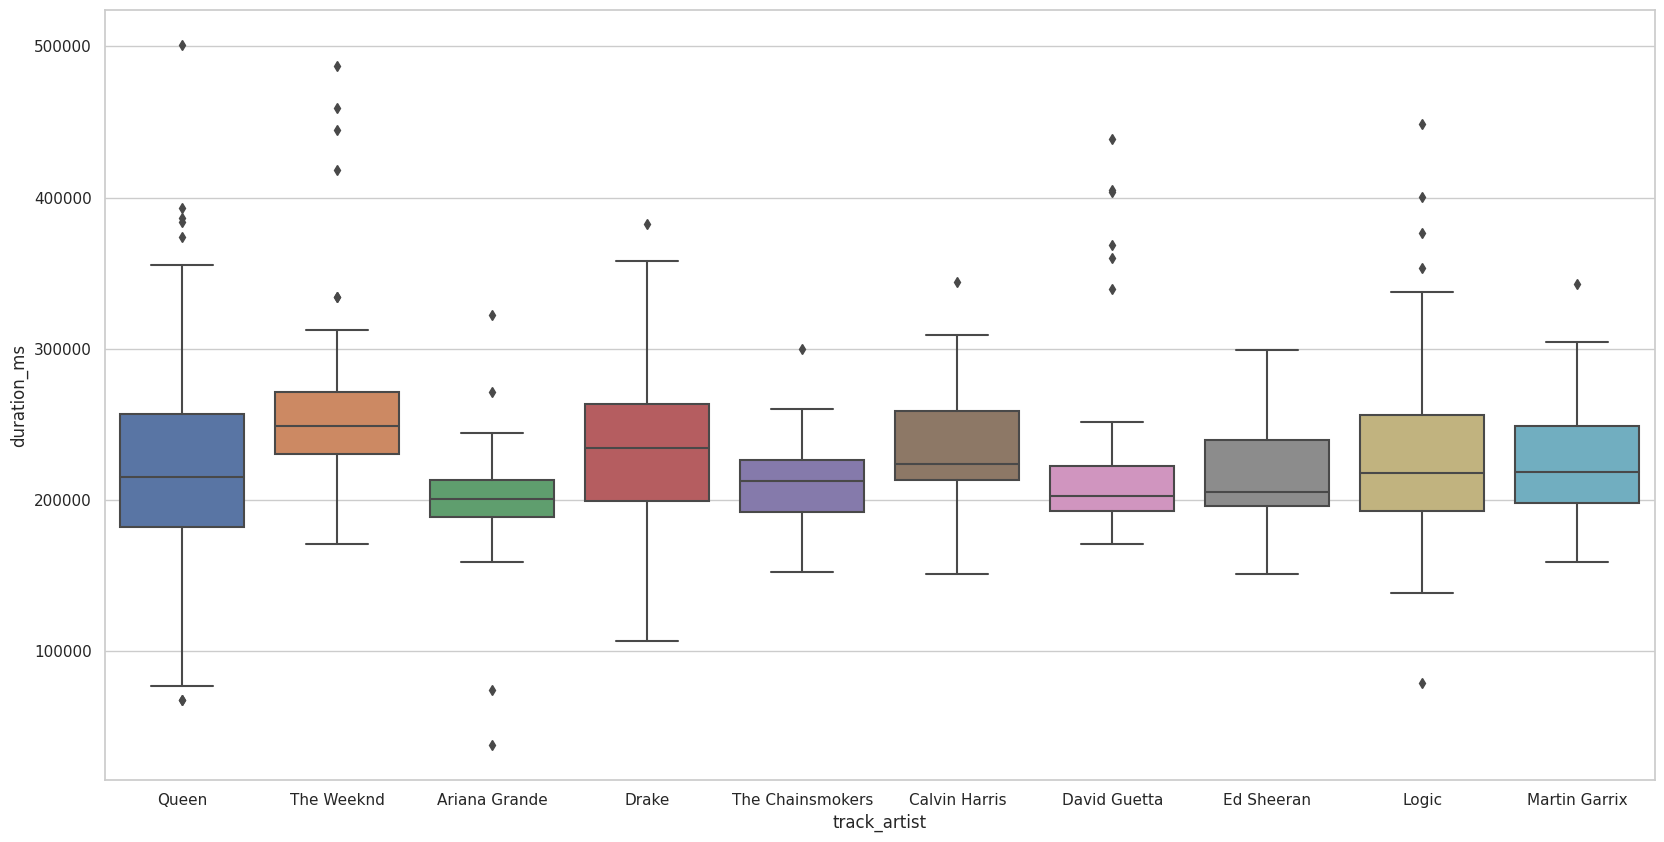

In [27]:
parameter = df_entop10.select_dtypes(include=['int64', 'float']).columns
for i in parameter:
    plt.figure(figsize=(20,10))
    sns.boxplot(x='track_artist', y=i, data=df_entop10)